## Data Cleaning

In [2]:
# import libraryes
import pandas as pd
from huggingface_hub import hf_hub_download
import matplotlib.pyplot as plt
import seaborn as sns

c:\Users\mahmo\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
# load dataset from hugging face
repo_id = "alalfi/SupplyChainDataset"
filename = "DataCoSupplyChainDataset1.csv"
csv_path = hf_hub_download(repo_id=repo_id, filename=filename, repo_type="dataset")
df = pd.read_csv(csv_path, encoding="ISO-8859-1")

In [ ]:
# show data 
df.head()

,Type,Days_for_shipping_(real),Days_for_shipment_(scheduled),Benefit_per_order,Sales_per_customer,Delivery_Status,Late_delivery_risk,Category_Id,Category_Name,Customer_City,...,Order_Zipcode,Product_Card_Id,Product_Category_Id,Product_Description,Product_Image,Product_Name,Product_Price,Product_Status,shipping_date_(DateOrders),Shipping_Mode
0,DEBIT,3,4,91.25000,314.64001,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018,Standard Class
1,TRANSFER,5,4,-249.09000,311.35999,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018,Standard Class
2,CASH,4,4,-247.78000,309.72000,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018,Standard Class
3,DEBIT,3,4,22.86000,304.81000,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018,Standard Class
4,PAYMENT,2,4,134.21001,298.25000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018,Standard Class


### Dataset Card
| Column Name                     | Type        | Description (Assumed)                 |
| ------------------------------- | ----------- | ------------------------------------- |
| `Type`                          | Categorical | Order type or transaction type        |
| `Days_for_shipping_(real)`      | Numeric     | Actual number of days taken to ship   |
| `Days_for_shipment_(scheduled)` | Numeric     | Scheduled days for shipment           |
| `Benefit_per_order`             | Numeric     | Profit or benefit from a single order |
| `Sales_per_customer`            | Numeric     | Total sales divided per customer      |
| `Delivery_Status`               | Categorical | Delivery status info                  |
| `Late_delivery_risk`            | Binary      | Indicator of risk (0 = No, 1 = Yes)   |
| `Category_Name`                 | Categorical | Product category name                 |
| `Customer_Country`              | Categorical | Country where customer resides        |
| `Customer_City`                 | Categorical | Customer’s city                       |
| `Customer_Segment`              | Categorical | Segment: Consumer, Corporate, etc.    |
| `Department_Name`               | Categorical | Department handling the order         |
| `Market`                        | Categorical | Market region or category             |
| `Order_City`                    | Categorical | City where order was placed           |
| `Order_Country`                 | Categorical | Country where order was placed        |
| `order_date_(DateOrders)`       | Date        | Order date                            |
| `Order_Id`                      | ID          | Unique identifier for each order      |
| `Order_Item_Product_Price`      | Numeric     | Price of a product in the order       |
| `Order_Item_Quantity`           | Numeric     | Quantity of product in the order      |
| `Sales`                         | Numeric     | Total sales value of the order        |
| `Order_Region`                  | Categorical | Region where the order was placed     |
| `Order_Status`                  | Categorical | Status of the order                   |
| `Product_Name`                  | Text        | Name of the product                   |
| `Product_Price`                 | Numeric     | Original price of the product         |
| `shipping_date_(DateOrders)`    | Date        | Actual shipping date                  |
| `Shipping_Mode`                 | Categorical | Shipping method used                  |
| `Order_Item_Total`              | Numeric     | Total amount for the item(s) ordered  |
| `Order_Profit_Per_Order`        | Numeric     | Profit made per order                 |



In [ ]:
# show data info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days_for_shipping_(real)       180519 non-null  int64  
 2   Days_for_shipment_(scheduled)  180519 non-null  int64  
 3   Benefit_per_order              180519 non-null  float64
 4   Sales_per_customer             180519 non-null  float64
 5   Delivery_Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category_Id                    180519 non-null  int64  
 8   Category_Name                  180519 non-null  object 
 9   Customer_City                  180519 non-null  object 
 10  Customer_Country               180519 non-null  object 
 11  Customer_Email                 180519 non-null  object 
 12  Customer_Fname                

In [ ]:
# show nulls for each coulmn
df.isnull().sum()

Type                                  0
Days_for_shipping_(real)              0
Days_for_shipment_(scheduled)         0
Benefit_per_order                     0
Sales_per_customer                    0
Delivery_Status                       0
Late_delivery_risk                    0
Category_Id                           0
Category_Name                         0
Customer_City                         0
Customer_Country                      0
Customer_Email                        0
Customer_Fname                        0
Customer_Id                           0
Customer_Lname                        8
Customer_Password                     0
Customer_Segment                      0
Customer_State                        0
Customer_Street                       0
Customer_Zipcode                      3
Department_Id                         0
Department_Name                       0
Latitude                              0
Longitude                             0
Market                                0


In [ ]:
# show describe
df.describe(include='all')

,Type,Days_for_shipping_(real),Days_for_shipment_(scheduled),Benefit_per_order,Sales_per_customer,Delivery_Status,Late_delivery_risk,Category_Id,Category_Name,Customer_City,...,Order_Zipcode,Product_Card_Id,Product_Category_Id,Product_Description,Product_Image,Product_Name,Product_Price,Product_Status,shipping_date_(DateOrders),Shipping_Mode
count,180519,180519.000000,180519.000000,180519.000000,180519.000000,180519,180519.000000,180519.000000,180519,180519,...,24843.000000,180519.000000,180519.000000,0.0,180519,180519,180519.000000,180519.0,180519,180519
unique,4,NaN,NaN,NaN,NaN,4,NaN,NaN,50,563,...,NaN,NaN,NaN,NaN,118,118,NaN,NaN,1131,4
top,DEBIT,NaN,NaN,NaN,NaN,Late delivery,NaN,NaN,Cleats,Caguas,...,NaN,NaN,NaN,NaN,http://images.acmesports.sports/Perfect+Fitnes...,Perfect Fitness Perfect Rip Deck,NaN,NaN,9/27/2017,Standard Class
freq,69295,NaN,NaN,NaN,NaN,98977,NaN,NaN,24551,66770,...,NaN,NaN,NaN,NaN,24515,24515,NaN,NaN,266,107752
mean,NaN,3.497654,2.931847,21.974989,183.107609,NaN,0.548291,31.851451,NaN,NaN,...,55420.648070,692.509764,31.851451,NaN,NaN,NaN,141.232547,0.0,NaN,NaN
std,NaN,1.623722,1.374449,104.433526,120.043670,NaN,0.497664,15.640064,NaN,NaN,...,31921.252921,336.446807,15.640064,NaN,NaN,NaN,139.732489,0.0,NaN,NaN
min,NaN,0.000000,0.000000,-4274.979980,7.490000,NaN,0.000000,2.000000,NaN,NaN,...,1040.000000,19.000000,2.000000,NaN,NaN,NaN,9.990000,0.0,NaN,NaN
25%,NaN,2.000000,2.000000,7.000000,104.380000,NaN,0.000000,18.000000,NaN,NaN,...,23464.000000,403.000000,18.000000,NaN,NaN,NaN,50.000000,0.0,NaN,NaN
50%,NaN,3.000000,4.000000,31.520000,163.990010,NaN,1.000000,29.000000,NaN,NaN,...,59405.000000,627.000000,29.000000,NaN,NaN,NaN,59.990000,0.0,NaN,NaN
75%,NaN,5.000000,4.000000,64.800000,247.399990,NaN,1.000000,45.000000,NaN,NaN,...,90008.000000,1004.000000,45.000000,NaN,NaN,NaN,199.990000,0.0,NaN,NaN


In [ ]:
# important coulmns
df = df[['Type',
         'Days_for_shipping_(real)',
         'Days_for_shipment_(scheduled)',
         'Benefit_per_order',
         'Sales_per_customer',
         'Delivery_Status',
         'Late_delivery_risk',
         'Category_Name',
         'Customer_Country',
         'Customer_City',
         'Customer_Segment',
         'Department_Name',
         'Market',
         'Order_City',
         'Order_Country',
         'order_date_(DateOrders)',
         'Order_Id',
         'Order_Item_Product_Price',
         'Order_Item_Quantity',
         'Sales',
         'Order_Region',
         'Order_Status',
         'Product_Name',
         'Product_Price',
         'shipping_date_(DateOrders)',
         'Shipping_Mode',
         'Order_Item_Total',
         'Order_Profit_Per_Order']]
df

,Type,Days_for_shipping_(real),Days_for_shipment_(scheduled),Benefit_per_order,Sales_per_customer,Delivery_Status,Late_delivery_risk,Category_Name,Customer_Country,Customer_City,...,Order_Item_Quantity,Sales,Order_Region,Order_Status,Product_Name,Product_Price,shipping_date_(DateOrders),Shipping_Mode,Order_Item_Total,Order_Profit_Per_Order
0,DEBIT,3,4,91.25000,314.64001,Advance shipping,0,Sporting Goods,Puerto Rico,Caguas,...,1,327.75000,Southeast Asia,COMPLETE,Smart watch,327.75,2/3/2018,Standard Class,314.64001,91.25
1,TRANSFER,5,4,-249.09000,311.35999,Late delivery,1,Sporting Goods,Puerto Rico,Caguas,...,1,327.75000,South Asia,PENDING,Smart watch,327.75,1/18/2018,Standard Class,311.35999,-249.09
2,CASH,4,4,-247.78000,309.72000,Shipping on time,0,Sporting Goods,EE. UU.,San Jose,...,1,327.75000,South Asia,CLOSED,Smart watch,327.75,1/17/2018,Standard Class,309.72000,-247.78
3,DEBIT,3,4,22.86000,304.81000,Advance shipping,0,Sporting Goods,EE. UU.,Los Angeles,...,1,327.75000,Oceania,COMPLETE,Smart watch,327.75,1/16/2018,Standard Class,304.81000,22.86
4,PAYMENT,2,4,134.21001,298.25000,Advance shipping,0,Sporting Goods,Puerto Rico,Caguas,...,1,327.75000,Oceania,PENDING_PAYMENT,Smart watch,327.75,1/15/2018,Standard Class,298.25000,134.21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,CASH,4,4,40.00000,399.98001,Shipping on time,0,Fishing,EE. UU.,Brooklyn,...,1,399.98001,Eastern Asia,CLOSED,Field & Stream Sportsman 16 Gun Fire Safe,399.98,1/20/2016,Standard Class,399.98001,40.00
180515,DEBIT,3,2,-613.77002,395.98001,Late delivery,1,Fishing,EE. UU.,Bakersfield,...,1,399.98001,Eastern Asia,COMPLETE,Field & Stream Sportsman 16 Gun Fire Safe,399.98,1/19/2016,Second Class,395.98001,-613.77
180516,TRANSFER,5,4,141.11000,391.98001,Late delivery,1,Fishing,EE. UU.,Bristol,...,1,399.98001,Oceania,PENDING,Field & Stream Sportsman 16 Gun Fire Safe,399.98,1/20/2016,Standard Class,391.98001,141.11
180517,PAYMENT,3,4,186.23000,387.98001,Advance shipping,0,Fishing,Puerto Rico,Caguas,...,1,399.98001,Oceania,PENDING_PAYMENT,Field & Stream Sportsman 16 Gun Fire Safe,399.98,1/18/2016,Standard Class,387.98001,186.23


In [ ]:
# show info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 28 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days_for_shipping_(real)       180519 non-null  int64  
 2   Days_for_shipment_(scheduled)  180519 non-null  int64  
 3   Benefit_per_order              180519 non-null  float64
 4   Sales_per_customer             180519 non-null  float64
 5   Delivery_Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category_Name                  180519 non-null  object 
 8   Customer_Country               180519 non-null  object 
 9   Customer_City                  180519 non-null  object 
 10  Customer_Segment               180519 non-null  object 
 11  Department_Name                180519 non-null  object 
 12  Market                        

In [ ]:
# show unique for each coulmn
for _ in df:
    print(df[_].unique(),'\n')

['DEBIT' 'TRANSFER' 'CASH' 'PAYMENT'] 

[3 5 4 2 6 0 1] 

[4 1 2 0] 

[  91.25    -249.09    -247.78    ... -103.97    -237.59    -337.10001] 

[314.64001 311.35999 309.72    ... 298.76999 403.70999 474.76001] 

['Advance shipping' 'Late delivery' 'Shipping on time' 'Shipping canceled'] 

[0 1] 

['Sporting Goods' 'Cleats' 'Shop By Sport' "Women's Apparel" 'Electronics'
 'Boxing & MMA' 'Cardio Equipment' 'Trade-In' "Kids' Golf Clubs"
 'Hunting & Shooting' 'Baseball & Softball' "Men's Footwear"
 'Camping & Hiking' 'Consumer Electronics' 'Cameras' 'Computers'
 'Basketball' 'Soccer' "Girls' Apparel" 'Accessories' "Women's Clothing"
 'Crafts' "Men's Clothing" 'Tennis & Racquet' 'Fitness Accessories'
 'As Seen on  TV!' 'Golf Balls' 'Strength Training' "Children's Clothing"
 'Lacrosse' 'Baby' 'Fishing' 'Books' 'DVDs' 'CDs' 'Garden' 'Hockey'
 'Pet Supplies' 'Health and Beauty' 'Music' 'Video Games' 'Golf Gloves'
 'Golf Bags & Carts' 'Golf Shoes' 'Golf Apparel' "Women's Golf Clubs"
 "Men's Gol

In [ ]:
# convert types to titles
df['Type'] = df['Type'].str.title()

In [ ]:
# convert data from 0,1 to yes, no 
df['Late_delivery_risk'] = df['Late_delivery_risk'].replace({0:"No", 1:"Yes"})

In [ ]:
# convert order status to title
df['Order_Status'] = df['Order_Status'].str.title()

In [ ]:
# convert same day to first class
df['Shipping_Mode'] = df['Shipping_Mode'].replace('Same Day','First Class')

In [ ]:
# modify the country names
df['Customer_Country'] = df['Customer_Country'].replace({
        "EE. UU.": "United States",
        "Puerto Rico": "Puerto Rico"
    })

In [ ]:
# show unique shipping mode
df['Shipping_Mode'].unique()

array(['Standard Class', 'First Class', 'Second Class'], dtype=object)

In [ ]:
# drop duplicates
df.drop_duplicates(inplace = True)

In [18]:
df.head(10)

,Type,Days_for_shipping_(real),Days_for_shipment_(scheduled),Benefit_per_order,Sales_per_customer,Delivery_Status,Late_delivery_risk,Category_Name,Customer_Country,Customer_City,...,Order_Item_Quantity,Sales,Order_Region,Order_Status,Product_Name,Product_Price,shipping_date_(DateOrders),Shipping_Mode,Order_Item_Total,Order_Profit_Per_Order
0,Debit,3,4,91.25000,314.64001,Advance shipping,No,Sporting Goods,Puerto Rico,Caguas,...,1,327.75,Southeast Asia,Complete,Smart watch,327.75,2/3/2018,Standard Class,314.64001,91.25
1,Transfer,5,4,-249.09000,311.35999,Late delivery,Yes,Sporting Goods,Puerto Rico,Caguas,...,1,327.75,South Asia,Pending,Smart watch,327.75,1/18/2018,Standard Class,311.35999,-249.09
2,Cash,4,4,-247.78000,309.72000,Shipping on time,No,Sporting Goods,United States,San Jose,...,1,327.75,South Asia,Closed,Smart watch,327.75,1/17/2018,Standard Class,309.72000,-247.78
3,Debit,3,4,22.86000,304.81000,Advance shipping,No,Sporting Goods,United States,Los Angeles,...,1,327.75,Oceania,Complete,Smart watch,327.75,1/16/2018,Standard Class,304.81000,22.86
4,Payment,2,4,134.21001,298.25000,Advance shipping,No,Sporting Goods,Puerto Rico,Caguas,...,1,327.75,Oceania,Pending_Payment,Smart watch,327.75,1/15/2018,Standard Class,298.25000,134.21
5,Transfer,6,4,18.58000,294.98001,Shipping canceled,No,Sporting Goods,United States,Tonawanda,...,1,327.75,Oceania,Canceled,Smart watch,327.75,1/19/2018,Standard Class,294.98001,18.58
6,Debit,2,1,95.18000,288.42001,Late delivery,Yes,Sporting Goods,Puerto Rico,Caguas,...,1,327.75,Eastern Asia,Complete,Smart watch,327.75,1/15/2018,First Class,288.42001,95.18
7,Transfer,2,1,68.43000,285.14001,Late delivery,Yes,Sporting Goods,United States,Miami,...,1,327.75,Eastern Asia,Processing,Smart watch,327.75,1/15/2018,First Class,285.14001,68.43
8,Cash,3,2,133.72000,278.59000,Late delivery,Yes,Sporting Goods,Puerto Rico,Caguas,...,1,327.75,Eastern Asia,Closed,Smart watch,327.75,1/16/2018,Second Class,278.59000,133.72
9,Cash,2,1,132.14999,275.31000,Late delivery,Yes,Sporting Goods,United States,San Ramon,...,1,327.75,Eastern Asia,Closed,Smart watch,327.75,1/15/2018,First Class,275.31000,132.15


In [ ]:
# show nulls for each column
df.isnull().sum()

Type                             0
Days_for_shipping_(real)         0
Days_for_shipment_(scheduled)    0
Benefit_per_order                0
Sales_per_customer               0
Delivery_Status                  0
Late_delivery_risk               0
Category_Name                    0
Customer_Country                 0
Customer_City                    0
Customer_Segment                 0
Department_Name                  0
Market                           0
Order_City                       0
Order_Country                    0
order_date_(DateOrders)          0
Order_Id                         0
Order_Item_Product_Price         0
Order_Item_Quantity              0
Sales                            0
Order_Region                     0
Order_Status                     0
Product_Name                     0
Product_Price                    0
shipping_date_(DateOrders)       0
Shipping_Mode                    0
Order_Item_Total                 0
Order_Profit_Per_Order           0
dtype: int64

In [ ]:
# convert shiping date and order date coulmns type to datetime type 
date_columns = [col for col in df.columns if "date" in col.lower()]
for col in date_columns:
    try:
        df[col] = pd.to_datetime(df[col], errors='coerce')
    except:
        pass

In [ ]:
# show data types for each coulmn
print(df.dtypes)

Type                                     object
Days_for_shipping_(real)                  int64
Days_for_shipment_(scheduled)             int64
Benefit_per_order                       float64
Sales_per_customer                      float64
Delivery_Status                          object
Late_delivery_risk                       object
Category_Name                            object
Customer_Country                         object
Customer_City                            object
Customer_Segment                         object
Department_Name                          object
Market                                   object
Order_City                               object
Order_Country                            object
order_date_(DateOrders)          datetime64[ns]
Order_Id                                  int64
Order_Item_Product_Price                  int64
Order_Item_Quantity                       int64
Sales                                   float64
Order_Region                            

In [ ]:
# Final report
print(" Data cleaning complete!")
print(f" Final shape: {df.shape}")
print(" Columns:", df.columns.tolist())
print(" Remaining missing values:\n", df.isnull().sum())

 Data cleaning complete!
 Final shape: (180519, 28)
 Columns: ['Type', 'Days_for_shipping_(real)', 'Days_for_shipment_(scheduled)', 'Benefit_per_order', 'Sales_per_customer', 'Delivery_Status', 'Late_delivery_risk', 'Category_Name', 'Customer_Country', 'Customer_City', 'Customer_Segment', 'Department_Name', 'Market', 'Order_City', 'Order_Country', 'order_date_(DateOrders)', 'Order_Id', 'Order_Item_Product_Price', 'Order_Item_Quantity', 'Sales', 'Order_Region', 'Order_Status', 'Product_Name', 'Product_Price', 'shipping_date_(DateOrders)', 'Shipping_Mode', 'Order_Item_Total', 'Order_Profit_Per_Order']
 Remaining missing values:
 Type                             0
Days_for_shipping_(real)         0
Days_for_shipment_(scheduled)    0
Benefit_per_order                0
Sales_per_customer               0
Delivery_Status                  0
Late_delivery_risk               0
Category_Name                    0
Customer_Country                 0
Customer_City                    0
Customer_Segmen

In [ ]:
# save data into csv file
df.to_csv("cleand_data.csv",index = False)

## EDA

In [ ]:
# explore data
df

,Type,Days_for_shipping_(real),Days_for_shipment_(scheduled),Benefit_per_order,Sales_per_customer,Delivery_Status,Late_delivery_risk,Category_Name,Customer_Country,Customer_City,...,Order_Item_Quantity,Sales,Order_Region,Order_Status,Product_Name,Product_Price,shipping_date_(DateOrders),Shipping_Mode,Order_Item_Total,Order_Profit_Per_Order
0,Debit,3,4,91.25000,314.64001,Advance shipping,No,Sporting Goods,Puerto Rico,Caguas,...,1,327.75000,Southeast Asia,Complete,Smart watch,327.75,2018-02-03,Standard Class,314.64001,91.25
1,Transfer,5,4,-249.09000,311.35999,Late delivery,Yes,Sporting Goods,Puerto Rico,Caguas,...,1,327.75000,South Asia,Pending,Smart watch,327.75,2018-01-18,Standard Class,311.35999,-249.09
2,Cash,4,4,-247.78000,309.72000,Shipping on time,No,Sporting Goods,United States,San Jose,...,1,327.75000,South Asia,Closed,Smart watch,327.75,2018-01-17,Standard Class,309.72000,-247.78
3,Debit,3,4,22.86000,304.81000,Advance shipping,No,Sporting Goods,United States,Los Angeles,...,1,327.75000,Oceania,Complete,Smart watch,327.75,2018-01-16,Standard Class,304.81000,22.86
4,Payment,2,4,134.21001,298.25000,Advance shipping,No,Sporting Goods,Puerto Rico,Caguas,...,1,327.75000,Oceania,Pending_Payment,Smart watch,327.75,2018-01-15,Standard Class,298.25000,134.21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,Cash,4,4,40.00000,399.98001,Shipping on time,No,Fishing,United States,Brooklyn,...,1,399.98001,Eastern Asia,Closed,Field & Stream Sportsman 16 Gun Fire Safe,399.98,2016-01-20,Standard Class,399.98001,40.00
180515,Debit,3,2,-613.77002,395.98001,Late delivery,Yes,Fishing,United States,Bakersfield,...,1,399.98001,Eastern Asia,Complete,Field & Stream Sportsman 16 Gun Fire Safe,399.98,2016-01-19,Second Class,395.98001,-613.77
180516,Transfer,5,4,141.11000,391.98001,Late delivery,Yes,Fishing,United States,Bristol,...,1,399.98001,Oceania,Pending,Field & Stream Sportsman 16 Gun Fire Safe,399.98,2016-01-20,Standard Class,391.98001,141.11
180517,Payment,3,4,186.23000,387.98001,Advance shipping,No,Fishing,Puerto Rico,Caguas,...,1,399.98001,Oceania,Pending_Payment,Field & Stream Sportsman 16 Gun Fire Safe,399.98,2016-01-18,Standard Class,387.98001,186.23


In [26]:
# Set visualization style
sns.set_style(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

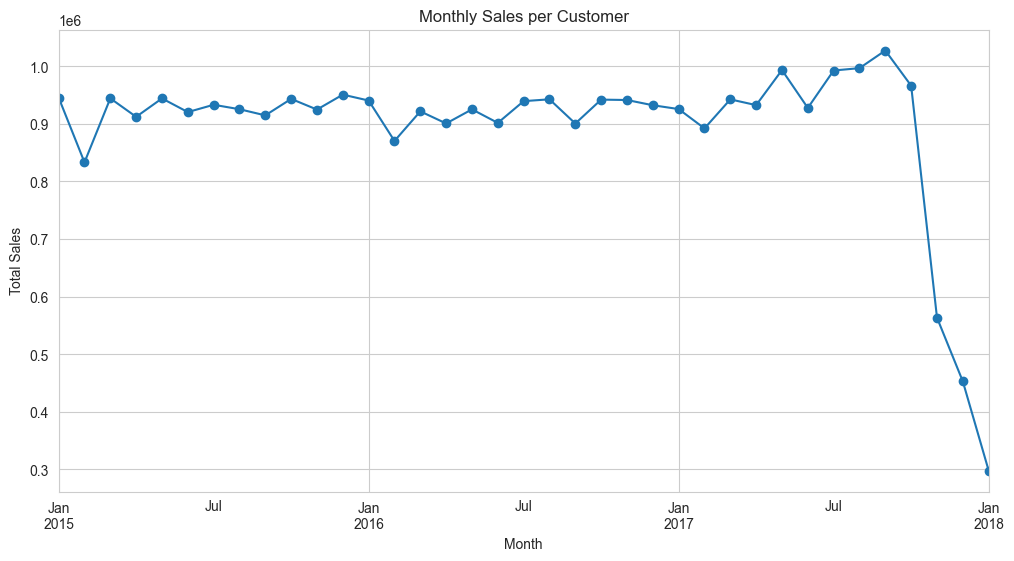

In [ ]:
# Monthly Sales per Customer
if 'order_date_(DateOrders)' in df.columns and 'Sales_per_customer' in df.columns:
    df['order_month'] = df['order_date_(DateOrders)'].dt.to_period('M')
    monthly_sales = df.groupby('order_month')['Sales_per_customer'].sum()
    monthly_sales.plot(kind='line', marker='o', title='Monthly Sales per Customer')
    plt.xlabel("Month")
    plt.ylabel("Total Sales")
    plt.show()

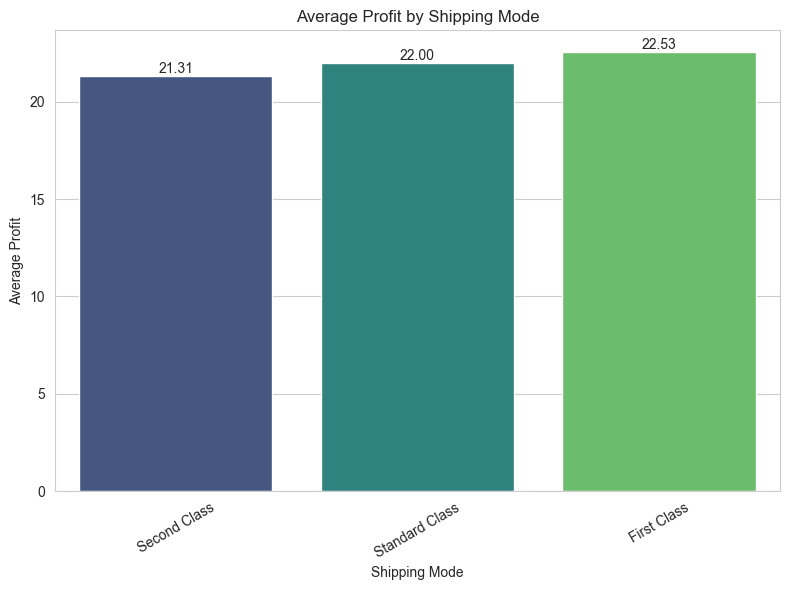

In [28]:
# Average Profit by Shipping Mode

if 'Shipping_Mode' in df.columns and 'Benefit_per_order' in df.columns:
    profit_by_shipping = df.groupby('Shipping_Mode')['Benefit_per_order'].mean().sort_values()

    plt.figure(figsize=(8,6))
    sns.set_style("whitegrid")

    ax = sns.barplot(x=profit_by_shipping.index, y=profit_by_shipping.values, palette="viridis")

    plt.title('Average Profit by Shipping Mode')
    plt.xlabel('Shipping Mode')
    plt.ylabel('Average Profit')

    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}',
                    (p.get_x() + p.get_width()/2, p.get_height()),
                    ha='center', va='bottom')

    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.show()


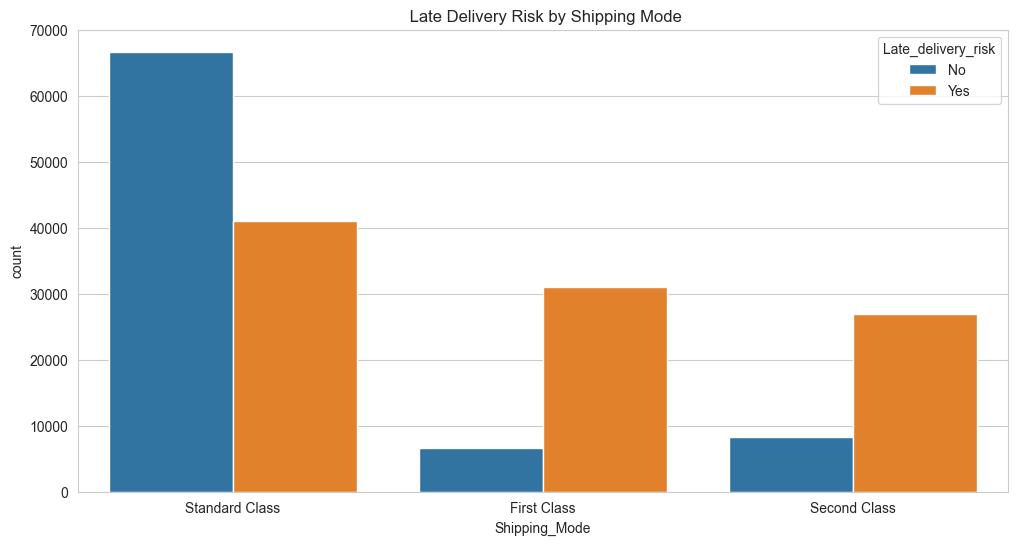

In [ ]:
# Late Delivery Risk by Shipping Mode
if 'Shipping_Mode' in df.columns and 'Late_delivery_risk' in df.columns:
    sns.countplot(data=df, x='Shipping_Mode', hue='Late_delivery_risk')
    plt.title(" Late Delivery Risk by Shipping Mode")
    plt.show()

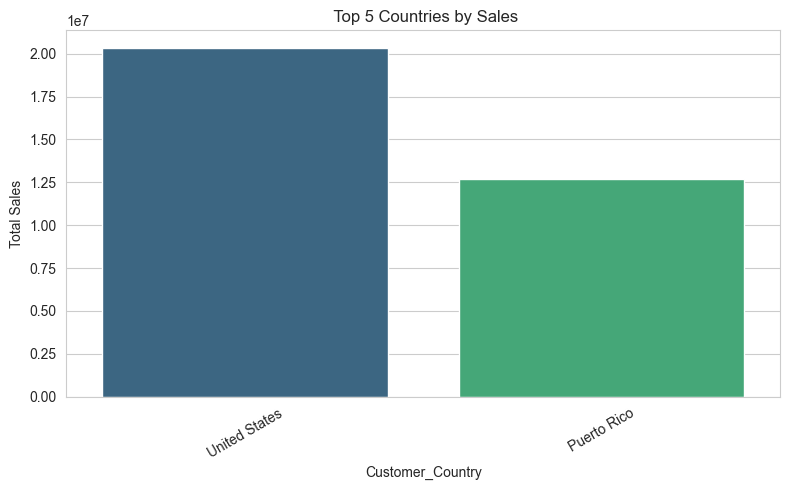

In [ ]:
# top 5 coulmns by sales
if 'Customer_Country' in df.columns and 'Sales_per_customer' in df.columns:
    top_countries = df.groupby('Customer_Country')['Sales_per_customer'].sum().sort_values(ascending=False).head(5)
    plt.figure(figsize=(8,5))
    sns.barplot(x=top_countries.index, y=top_countries.values, palette="viridis")
    plt.title(' Top 5 Countries by Sales')
    plt.ylabel('Total Sales')
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.show();

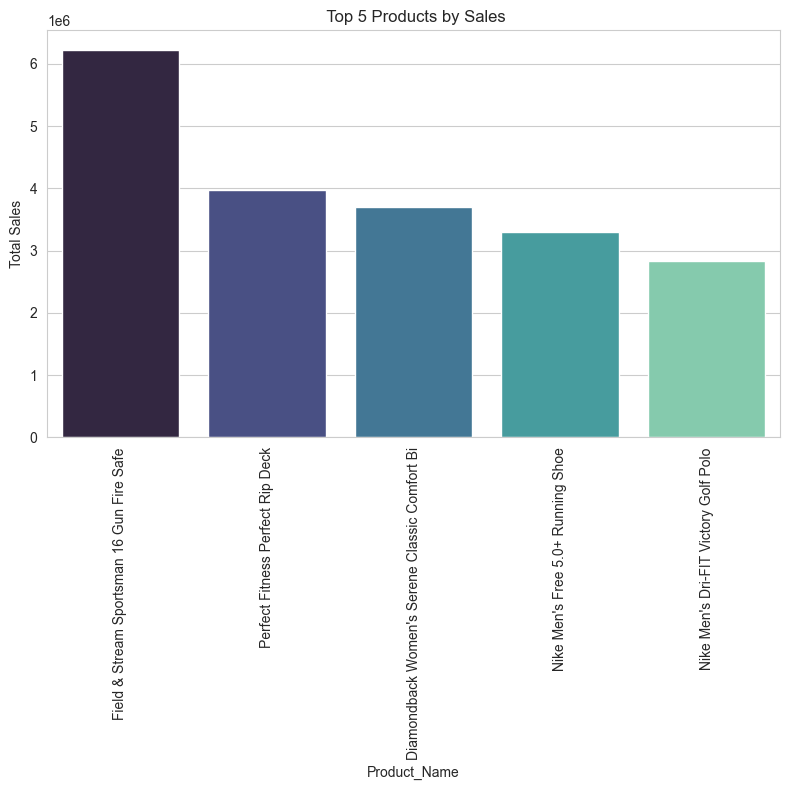

In [ ]:
# Top 5 Products by Sales
if 'Product_Name' in df.columns and 'Sales_per_customer' in df.columns:
    top_products = df.groupby('Product_Name')['Sales_per_customer'].sum().nlargest(5)
    plt.figure(figsize=(8,8))
    sns.barplot(x=top_products.index, y=top_products.values, palette="mako")
    plt.title(' Top 5 Products by Sales')
    plt.ylabel('Total Sales')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

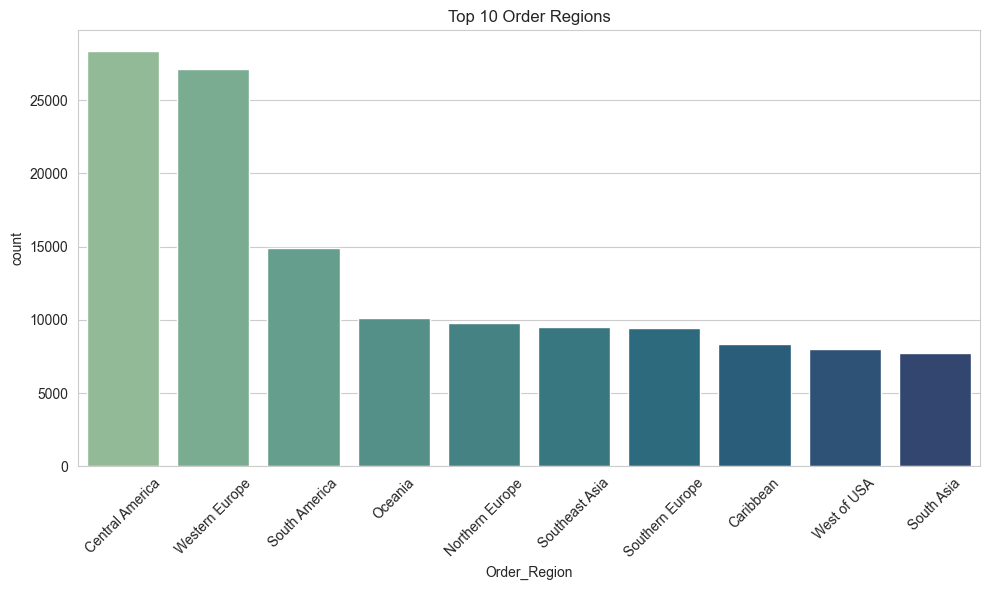

In [ ]:
# Get top 10 regions Filter DataFrame
if 'Order_Region' in df.columns:
    top_regions = df['Order_Region'].value_counts().nlargest(10).index 
    filtered_df = df[df['Order_Region'].isin(top_regions)]                          
    plt.figure(figsize=(10,6))
    sns.countplot(data=filtered_df,
                  x='Order_Region',
                  order=top_regions,
                  palette="crest")
    plt.title("Top 10 Order Regions")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


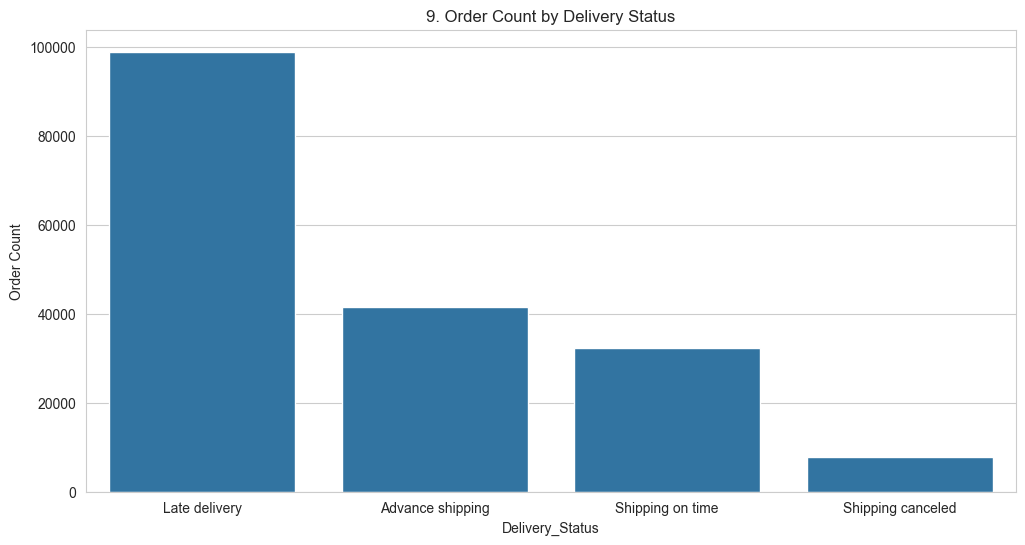

In [ ]:
# Order Count by Delivery Status
plt.figure()
sns.countplot(data=df, x='Delivery_Status', order=df['Delivery_Status'].value_counts().index)
plt.title("9. Order Count by Delivery Status")
plt.ylabel("Order Count")
plt.show()

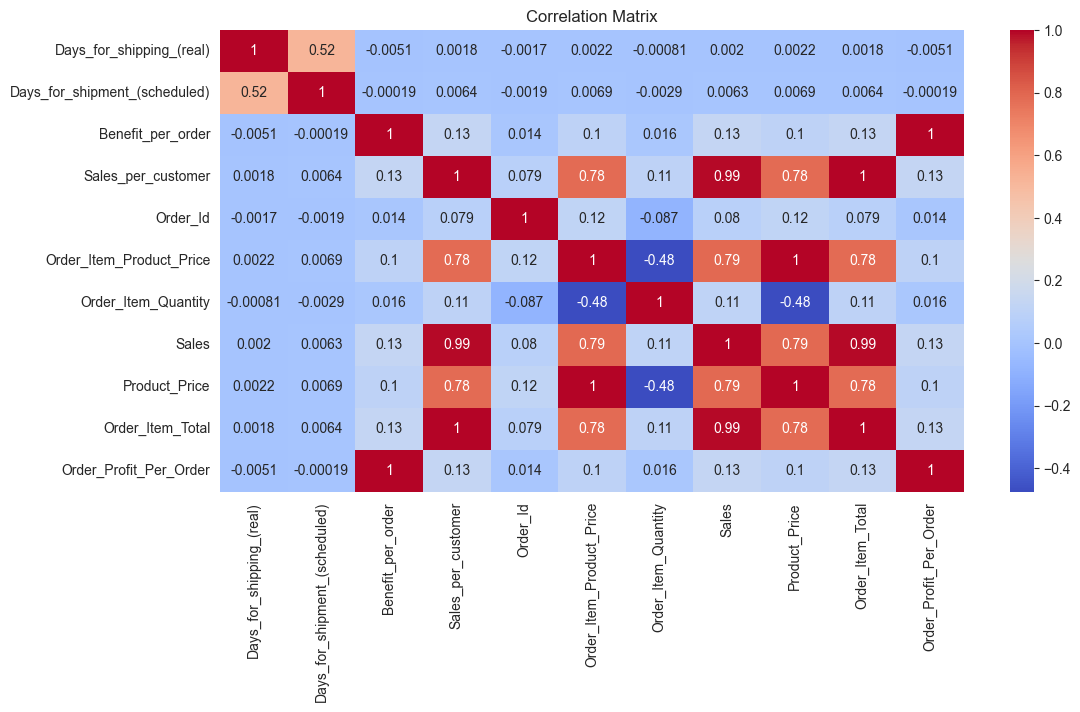

In [ ]:
# show corr between each coulmns
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

## KPI

In [40]:
# KPI Calculations
kpis = {
    "corr_real_scheduled": df['Days_for_shipping_(real)'].corr(df['Days_for_shipment_(scheduled)']),
    "Total Sales": df['Sales_per_customer'].sum(),
    "Total Orders": df['Order_Id'].nunique(),
    "Average Order Value": df['Sales_per_customer'].mean(),
    "Top Product by Sales": df.groupby('Product_Name')['Sales_per_customer'].sum().idxmax(),

    "Average Shipping Days": df['Days_for_shipping_(real)'].mean(),
    "Late Delivery Rate (%)": df['Late_delivery_risk'].value_counts(normalize=True).get('Yes', 0) * 100,
    "On-Time Delivery Rate (%)": df['Late_delivery_risk'].value_counts(normalize=True).get('No', 0) * 100,

    "Total Profit": df['Benefit_per_order'].sum(),
    "Average Profit per Order": df['Benefit_per_order'].mean(),
    "Loss-Making Orders Count": df[df['Benefit_per_order'] < 0].shape[0],
    "Top Country by Sales": df.groupby('Customer_Country')['Sales_per_customer'].sum().idxmax(),
    "Top Region by Orders": df['Order_Region'].value_counts().idxmax(),
}

In [36]:
# KPI Descriptions
descriptions = {
    "Total Sales": "Total revenue from all orders — measures overall financial performance.",
    "Total Orders": " Number of orders — reflects sales volume and customer activity.",
    "Average Order Value": " Average amount spent per order — helps with pricing and upsell decisions.",
    "Top Product by Sales": " Best-selling product — ideal for inventory planning and promotions.",

    "Average Shipping Days": " Average time to deliver — shorter times lead to better customer satisfaction.",
    "Late Delivery Rate (%)": " % of orders at risk of delay — high values indicate logistical issues.",
    "On-Time Delivery Rate (%)": " % of orders delivered on time — higher is better for trust and loyalty.",

    "Total Profit": " Net profit across all orders — shows overall business health.",
    "Average Profit per Order": " Profitability per order — helps assess how efficiently the business earns.",
    "Loss-Making Orders Count": " Number of orders with negative profit — should be minimized.",

    "Unique Customers": " Count of individual customers — shows market reach.",
    "Repeat Customer Rate (%)": " % of customers who bought more than once — loyalty indicator.",
    "Top Customer by Revenue": " Customer with the highest spending — ideal for retention focus.",

    "Top Country by Sales": " Country contributing most sales — prioritize marketing or expansion here.",
    "Top Region by Orders": " Region with highest order volume — operational or sales hotspot.",
}

In [37]:
# Display KPIs with explanations
for kpi, value in kpis.items():
    print(f"{kpi}: {value}")
    print(f"➡️  {descriptions[kpi]}")
    print("-" * 60)


Total Sales: 33054402.475660004
➡️  Total revenue from all orders — measures overall financial performance.
------------------------------------------------------------
Total Orders: 65752
➡️   Number of orders — reflects sales volume and customer activity.
------------------------------------------------------------
Average Order Value: 183.10760903650032
➡️   Average amount spent per order — helps with pricing and upsell decisions.
------------------------------------------------------------
Top Product by Sales: Field & Stream Sportsman 16 Gun Fire Safe
➡️   Best-selling product — ideal for inventory planning and promotions.
------------------------------------------------------------
Average Shipping Days: 3.4976539865609713
➡️   Average time to deliver — shorter times lead to better customer satisfaction.
------------------------------------------------------------
Late Delivery Rate (%): 54.82913155955883
➡️   % of orders at risk of delay — high values indicate logistical issues.